# Solving the Titanic Datascience Project with R

In this notebook, I attempt to use simple logistic regression to predict which passeng

# 1. Getting Started

## 1.1 Loading libraries

Loading the libraries in R, required to solve this competition

In [1]:
## Loading the libraries
require(dplyr)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## 1.2: Loading data

In [2]:
## Reading the Training Data
df = read.csv2("/kaggle/input/titanic/train.csv",sep =",")


## Making Pclass a factor variable
df$Pclass = as.factor(df$Pclass)

# Viewing the data
glimpse(df)
head(df,10)

Rows: 891
Columns: 12
$ PassengerId <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…
$ Survived    <int> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1…
$ Pclass      <fct> 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3…
$ Name        <chr> "Braund, Mr. Owen Harris", "Cumings, Mrs. John Bradley (Fl…
$ Sex         <chr> "male", "female", "female", "female", "male", "male", "mal…
$ Age         <chr> "22", "38", "26", "35", "35", "", "54", "2", "27", "14", "…
$ SibSp       <int> 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1, 0…
$ Parch       <int> 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, 0…
$ Ticket      <chr> "A/5 21171", "PC 17599", "STON/O2. 3101282", "113803", "37…
$ Fare        <chr> "7.25", "71.2833", "7.925", "53.1", "8.05", "8.4583", "51.…
$ Cabin       <chr> "", "C85", "", "C123", "", "", "E46", "", "", "", "G6", "C…
$ Embarked    <chr> "S", "C", "S", "S", "S", "Q", "S", "S", "S", "C", "S", "S"…


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S


# 2. Exploring Data

## 2.1: Checking Data
Looking for any NAs in the data

In [3]:
## Checking for any na in the dataset

## In our prediction variable Y,
table(df$Survived)

## Checking for NA in entire training dataset
any(is.na(df))

342/(549+342)



  0   1 
549 342 

[1] FALSE

[1] 0.3838384

So from above, we can see that there is no NA in the dataset but we find that certain predictors have incorrec types such as `Age` and `Fare`. Let us correct for them before proceeding further.

In [4]:
df$Age = as.numeric(df$Age)
df$Fare = as.numeric(df$Fare)

# Checking the types agains
glimpse(df)

Rows: 891
Columns: 12
$ PassengerId <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…
$ Survived    <int> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1…
$ Pclass      <fct> 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3…
$ Name        <chr> "Braund, Mr. Owen Harris", "Cumings, Mrs. John Bradley (Fl…
$ Sex         <chr> "male", "female", "female", "female", "male", "male", "mal…
$ Age         <dbl> 22, 38, 26, 35, 35, NA, 54, 2, 27, 14, 4, 58, 20, 39, 14, …
$ SibSp       <int> 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1, 0…
$ Parch       <int> 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, 0…
$ Ticket      <chr> "A/5 21171", "PC 17599", "STON/O2. 3101282", "113803", "37…
$ Fare        <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 8.4583, 51.8625,…
$ Cabin       <chr> "", "C85", "", "C123", "", "", "E46", "", "", "", "G6", "C…
$ Embarked    <chr> "S", "C", "S", "S", "S", "Q", "S", "S", "S", "C", "S", "S"…


So now it seems all predictors have correct type, Now let explore some predictors to see if they have any relationship with the response variable `Survived`

## 2.2: Exploring relations

### 2.2.1: With Numerical Variables

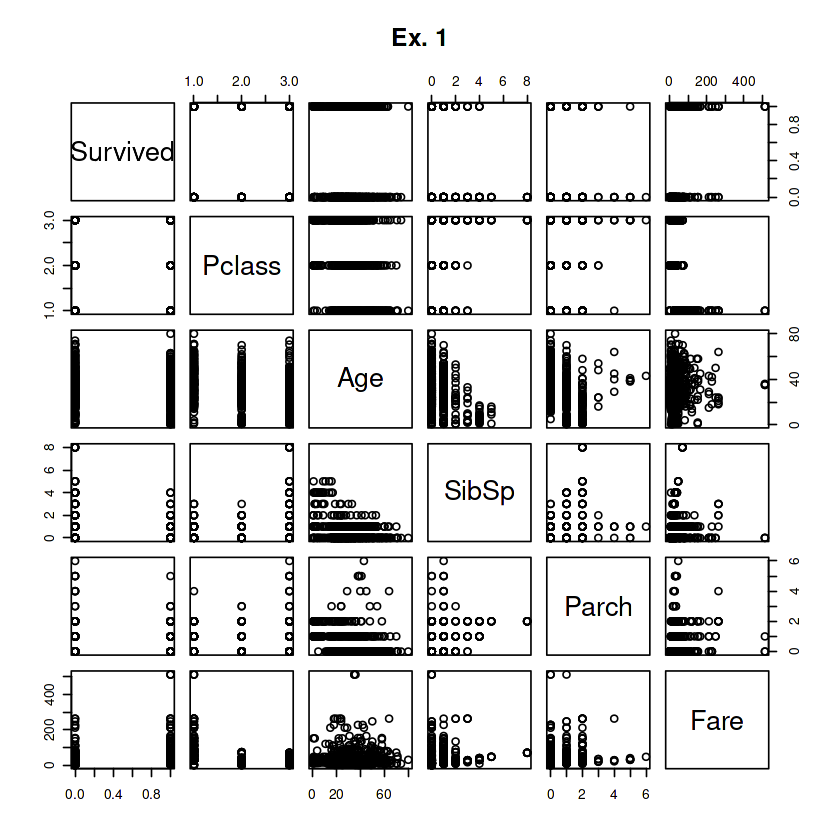

In [5]:
## Selecting only numeric columns of df to do cross plots
pairs(df%>% select(Survived, Pclass, Age, SibSp, Parch, Fare),main = "Ex. 1")



From the above chart as we usually expect `Age` is negative correlated with `Survived`, `Fare` is positively correlated with `Survived`. See Below *Ex. 2* and *Ex. 3*


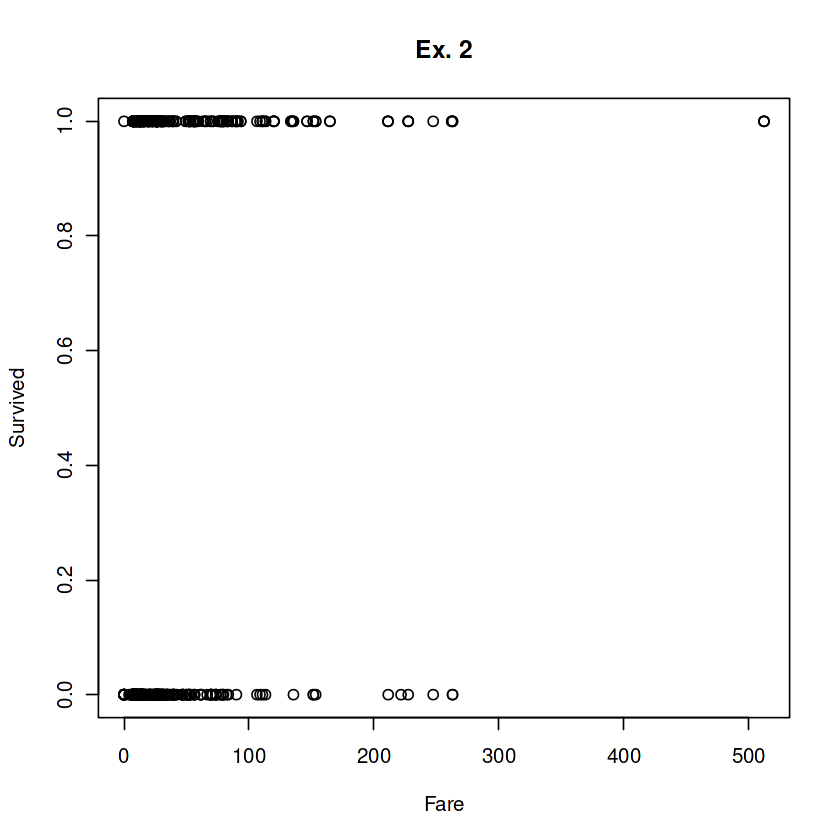

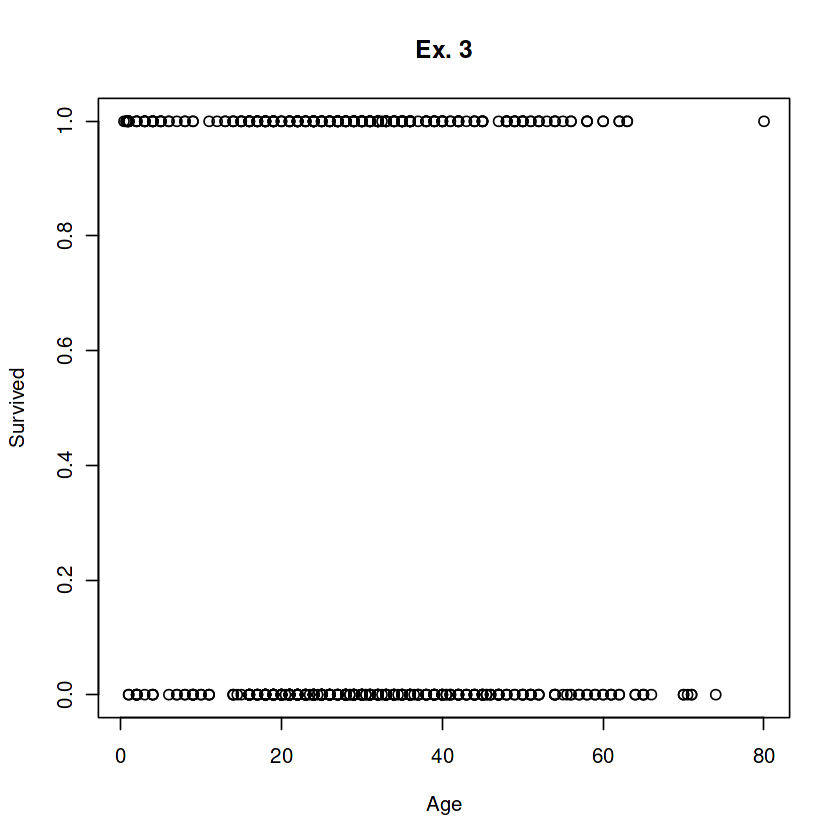

In [6]:
plot(df[,"Fare"],df[,"Survived"],xlab = "Fare", ylab = "Survived", main = "Ex. 2")
plot(df[,"Age"],df[,"Survived"],xlab = "Age", ylab = "Survived", main = "Ex. 3")

Interestingly, it seems from the data that a passenger is less likely to survive more the number of relatives are onboard as `Survived` is negatively correlated with `SibSp` and `Parch`. see below *Ex. 4* and *Ex. 5*

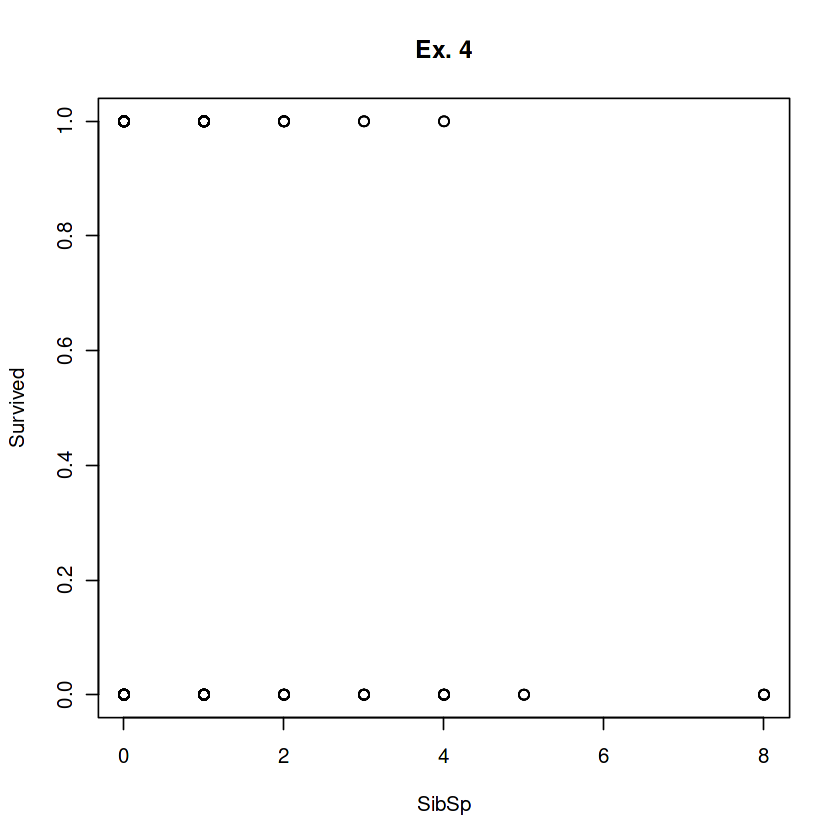

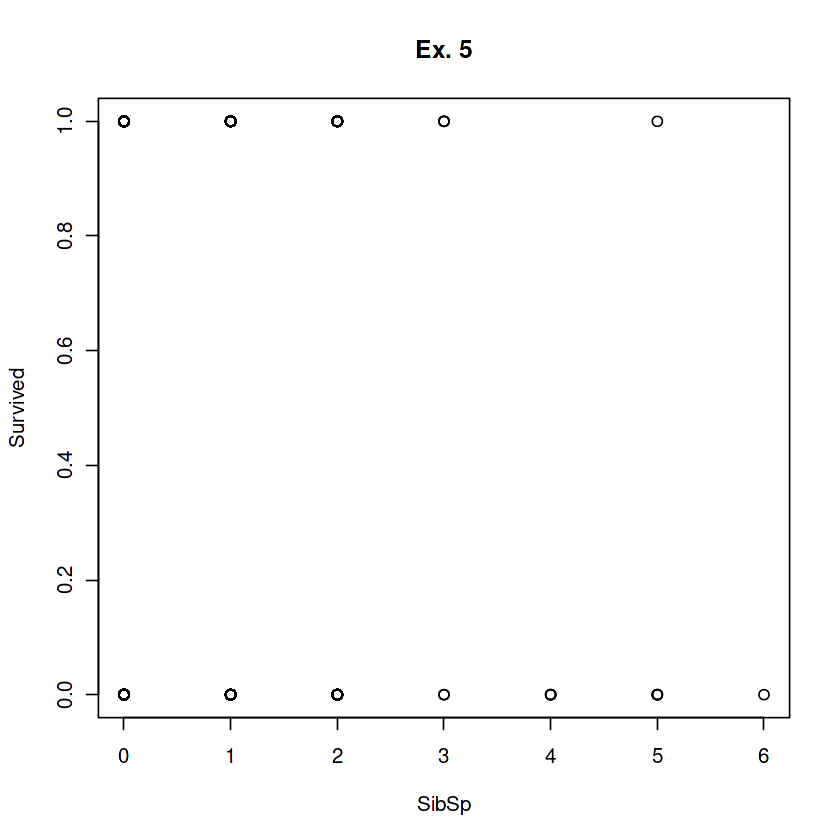

In [7]:
plot(df[,"SibSp"],df[,"Survived"],xlab = "SibSp", ylab = "Survived",main = "Ex. 4")
plot(df[,"Parch"],df[,"Survived"],xlab = "SibSp", ylab = "Survived",main = "Ex. 5")


We will turn to exploring class data now and see if it has some relation with the response variable `Survived`

### 2.2.2: With Categorical variables
#### 2.2.2.1: Surived relationshp with Sex

It seems that females have survived more than males as within `Survived = 1` class female proportion is higher compared to class `Survived = 0` 

Sex,cnts,Survived,survival_ratio
<chr>,<int>,<int>,<dbl>
female,314,233,0.7420382
male,577,109,0.1889081


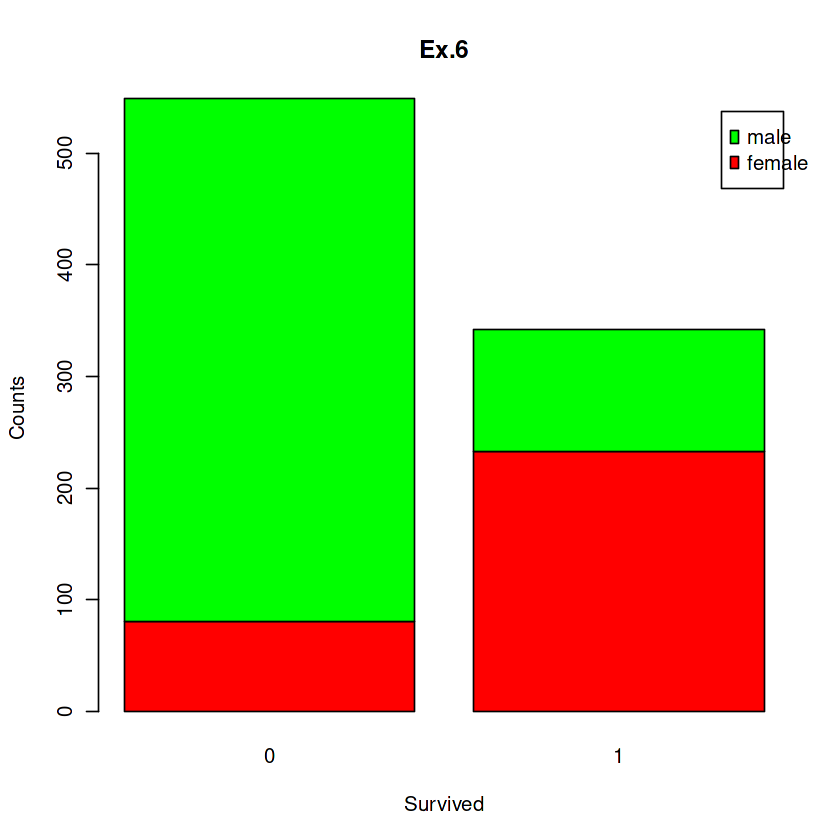

In [8]:
t_sex_survived = table(df$Sex,df$Survived)
#t_sex_survived
barplot(t_sex_survived,col = c('red',"green"),
        legend = rownames(t_sex_survived), 
        xlab = "Survived", ylab = "Counts", main = "Ex.6")
df%>% group_by(Sex) %>% summarize(cnts = n(),
                                    Survived = sum(Survived),
                                   survival_ratio = sum(Survived)/n())

#### 2.2.2.2: With Ports from the passenger embarked

Its seems that people who embarked from *Cherbourgh* port are more likely to survive then from other ports

Embarked,cnts,Survived,survival_ratio
<chr>,<int>,<int>,<dbl>
,2,2,1.0000000
C,168,93,0.5535714
Q,77,30,0.3896104
S,644,217,0.3369565


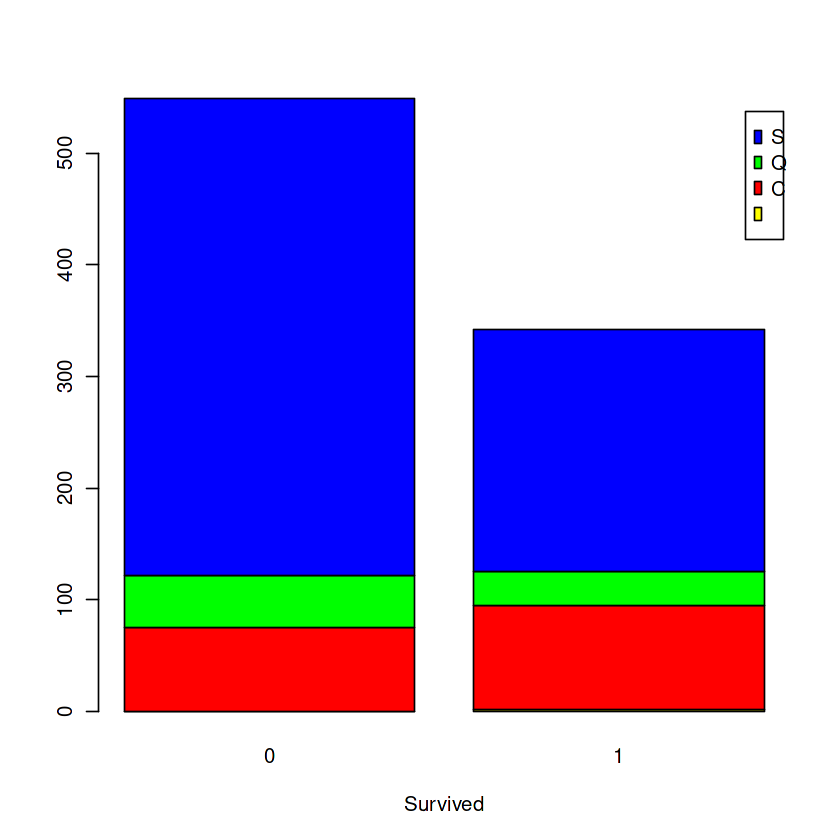

In [9]:
t_embarked_survived = table(df$Embarked,df$Survived)
#t_embarked_survived
barplot(t_embarked_survived,
        col = c("yellow","red","green","blue"),
        legend = rownames(t_embarked_survived), 
        xlab = "Survived",
       )
df%>% group_by(Embarked) %>% summarize(cnts = n(),
                                    Survived = sum(Survived),
                                   survival_ratio = sum(Survived)/n())

#### 2.2.2.3: Relationship between Cabin and Survived

Here, I will check if the location or class of the `Cabin` has some relevent information for the `Survived` class. Let me extract the cabin group such as *A*,*B*, ... from the `Cabin` class.

In [10]:
## Extracting the cabin group from the cabin label
df$Cabin_group = substr(df$Cabin,1,1)


df%>% group_by(Cabin_group) %>% summarize(cnts = n(),
                                    Survived = sum(Survived),
                                   survival_ratio = sum(Survived)/n())

Cabin_group,cnts,Survived,survival_ratio
<chr>,<int>,<int>,<dbl>
,687,206,0.2998544
A,15,7,0.4666667
B,47,35,0.7446809
C,59,35,0.5932203
D,33,25,0.7575758
E,32,24,0.7500000
F,13,8,0.6153846
G,4,2,0.5000000
T,1,0,0.0000000


It seems people from cabin groups *B*, *D* and *E* are more likely to survive than other cabin groups.

#### 2.2.2.4: Checking for any relationship between Survived and Ticket Number

In [11]:
head(df %>% select(Survived, Ticket,Cabin),40)

,Survived,Ticket,Cabin
,<int>,<chr>,<chr>
1,0,A/5 21171,
2,1,PC 17599,C85
3,1,STON/O2. 3101282,
4,1,113803,C123
5,0,373450,
6,0,330877,
7,0,17463,E46
8,0,349909,
9,1,347742,


On a quick glance, it seems hard that `Ticket` has any relationship with `Survived`, so I will ignore it for now

#### 2.2.2.5: Checking for relationship between Surivied and Name

A priori there should not be any relationship between Survived and Name and it seems to be the case also see below

,Survived,Name,Name_length
,<int>,<chr>,<int>
1,0,"Braund, Mr. Owen Harris",23
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",51
3,1,"Heikkinen, Miss. Laina",22
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
5,0,"Allen, Mr. William Henry",24
6,0,"Moran, Mr. James",16
7,0,"McCarthy, Mr. Timothy J",23
8,0,"Palsson, Master. Gosta Leonard",30
9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",49


,Survived,Name_length
Survived,1.0000000,0.3234409
Name_length,0.3234409,1.0000000


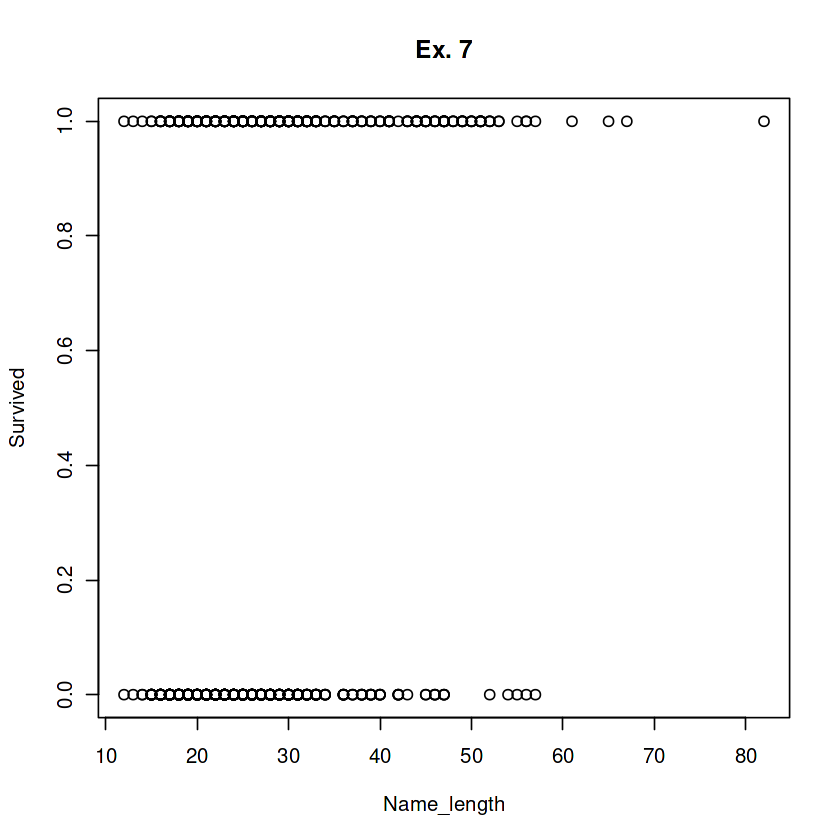

In [12]:
## Count the letters in the Name columns
df$Name_length = nchar(df$Name)
head(df %>% select(Survived, Name, Name_length),10)

## Checking if any Name_length has relationship with survival
plot(df[,"Name_length"],df[,"Survived"],xlab = "Name_length", ylab = "Survived", main = "Ex. 7")
cor(df %>% select(Survived, Name_length)%>% filter(Name_length < 60) )

#### 2.2.2.6: Checking Survival by Passenger Class type

The passengers belonging to `Pclass = 1` are more likely to survive than passengers belonging to other class. 

In [13]:
df%>% group_by(Pclass) %>% summarize(cnts = n(),
                                    Survived = sum(Survived),
                                   survival_ratio = sum(Survived)/n())


Pclass,cnts,Survived,survival_ratio
<fct>,<int>,<int>,<dbl>
1,216,136,0.6296296
2,184,87,0.4728261
3,491,119,0.2423625


# 3. Modeling Variables

I will mainly use the logistic regression in predicting survival probablities. I choose logistic regression because I think this, if done wisely, can be as good as other more sophisticated techniques such as SVM, KNN or Neural Networks since our sample size is small and we have limited number of features. If its not good as other techniques then atleast, It can act as good benchmark for other models. 

I will divide my data roughly into 75% as Training sample and 25% as the test sample. I don't want to use entire *train.csv* since I want to choose my model parameters or important coefficient through *cross-validation* approach. You can refer to  **An Introduction to Statistical Learning** Second Edition. 



In [14]:
## Extracting 75% as training sample and keeping 25% in the test sample
set.seed(123)
train_sample = sample(1:nrow(df),0.75*nrow(df))
df_train = df[train_sample,]
df_test = df[-train_sample,]
glimpse(df_train)

Rows: 668
Columns: 14
$ PassengerId <int> 415, 463, 179, 526, 195, 818, 118, 299, 229, 244, 14, 374,…
$ Survived    <int> 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0…
$ Pclass      <fct> 3, 1, 2, 3, 1, 2, 2, 1, 2, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3…
$ Name        <chr> "Sundman, Mr. Johan Julian", "Gee, Mr. Arthur H", "Hale, M…
$ Sex         <chr> "male", "male", "male", "male", "female", "male", "male", …
$ Age         <dbl> 44.0, 47.0, 30.0, 40.5, 44.0, 31.0, 29.0, NA, 18.0, 22.0, …
$ SibSp       <int> 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0…
$ Parch       <int> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Ticket      <chr> "STON/O 2. 3101269", "111320", "250653", "367232", "PC 176…
$ Fare        <dbl> 7.9250, 38.5000, 13.0000, 7.7500, 27.7208, 37.0042, 21.000…
$ Cabin       <chr> "", "E63", "", "", "B4", "", "", "C106", "", "", "", "", "…
$ Embarked    <chr> "S", "S", "S", "Q", "C", "C", "S", "S", "S", "S", "S", "C"…
$ Cabin_group <chr

In [15]:
## Checking for Embarked distribution in the training sample
table(df_train$Embarked)
table(df_test$Embarked)


  C   Q   S 
132  63 473 


      C   Q   S 
  2  36  14 171 

Since my test sample has two observation for which no data on `Embarked` is available so I will drop these two observation from my test sample and proceed. I need to drop these as otherwise, I cannot run the prediciton on the test sample. 

In [16]:
# Dropping the two observations from the test sample where Embarked is null
df_test = df_test[!df_test$Embarked == "",]
table(df_test$Embarked)


  C   Q   S 
 36  14 171 

## 3.2 Logistic Regression

I am running a very simple model first by fitting every possible variable that we have in the model. Later on by CV, I can identify which variable to keep or drop from the model. 

In [17]:
## Fit a logistic regression model
logit_m1 = glm(Survived ~ Age + Sex + SibSp + Parch + Fare + Embarked + Pclass + Cabin_group,
               data = df_train,
               family = binomial(link = "logit"))
summary(logit_m1)



Call:
glm(formula = Survived ~ Age + Sex + SibSp + Parch + Fare + Embarked + 
    Pclass + Cabin_group, family = binomial(link = "logit"), 
    data = df_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1814  -0.5908  -0.3529   0.5826   2.5574  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    3.971126   0.773239   5.136 2.81e-07 ***
Age           -0.051423   0.010268  -5.008 5.50e-07 ***
Sexmale       -2.819737   0.272108 -10.363  < 2e-16 ***
SibSp         -0.394643   0.148921  -2.650  0.00805 ** 
Parch         -0.095894   0.139449  -0.688  0.49167    
Fare           0.003144   0.003370   0.933  0.35091    
EmbarkedQ     -0.243739   0.720803  -0.338  0.73525    
EmbarkedS     -0.471726   0.329623  -1.431  0.15240    
Pclass2       -0.412978   0.588575  -0.702  0.48289    
Pclass3       -1.622396   0.598133  -2.712  0.00668 ** 
Cabin_groupA   1.595407   0.910222   1.753  0.07964 .  
Cabin_groupB   1.034904   0.725156   

From the above results, we can confirm our earlier findings as follows:

1. Age is negative associated with survival chance. 
2. Males are less likely to survive than females. 
3. Passengers with more numbers of siblings are less likely to survive.
4. Passengers belonging to lower socio-economic class such as `Pclass = 3` are less likely to surivive.
5. Passengers who belonged to `Cabin group = E` are more likely to survive.

In [18]:
# Fitting the model on the test sample
logit_m1_pred_prob_train = predict(logit_m1,df_train,type = "response")
logit_m1_pred_train = ifelse(logit_m1_pred_prob_train > 0.5,1,0)
table(logit_m1_pred_train,df_train$Survived)

                   
logit_m1_pred_train   0   1
                  0 273  54
                  1  41 161

In [19]:
## Writing the function to calculate the accuracy of the classifier (CFR)
CFR_accuracy = function(pred,actual){
    res = list()
    pred_mat = table(pred,actual)
    res$accuracy = sum(diag(pred_mat))/sum(pred_mat)
    res$false_positive = pred_mat[2,1]/sum(pred_mat[,1])
    res$false_negative = pred_mat[1,2]/sum(pred_mat[,2])
    return(as.data.frame(res)) 
}

In [20]:
## Testing Accuracy on the Training Sample
CFR_accuracy(logit_m1_pred_train,df_train$Survived)

accuracy,false_positive,false_negative
<dbl>,<dbl>,<dbl>
0.8204159,0.1305732,0.2511628


In [21]:
## Testiing the model on the test sample
logit_m1_pred_prob_test = predict(logit_m1,df_test,type = "response")
logit_m1_pred_test = ifelse(logit_m1_pred_prob_test > 0.5,1,0)
CFR_accuracy(logit_m1_pred_test,df_test$Survived)

accuracy,false_positive,false_negative
<dbl>,<dbl>,<dbl>
0.7759563,0.1818182,0.2876712


From the results on training and test data, it is clear that false negative error is more than the false positive error. Thus, we could do better if we lower the threshold for probabilities. Let me do this for threshold equal to 0.1, 0.2, 0.3, 0.4, 0.5, 0.6 and 0.7

In [22]:
threshold_picker = function(model,
                            df_train, 
                            df_test, 
                            y,
                            prob_threshold_test = seq(0.1,0.9,by = 0.1)){
## Running the loop on different threshold values and storing results on test and train dfs
train_prob = predict(model,df_train,type = "response")
test_prob = predict(model,df_test,type = "response")

## Intiating a empty dataframe with 7 cols and no rows
df_res = data.frame(matrix(NA, ncol = 7,nrow = 0))
names(df_res) = c("tr_Acc","tr_FP","tr_FN",
                    "ts_Acc","ts_FP","ts_FN","threshold")
for(i in prob_threshold_test){
    train_pred_i = ifelse(train_prob > i ,1,0)
    test_pred_i = ifelse(test_prob > i ,1,0)
    train_res = CFR_accuracy(train_pred_i,df_train[,y])
    test_res = CFR_accuracy(test_pred_i,df_test[,y])
    res = cbind(train_res,test_res)
    names(res) = c("tr_Acc","tr_FP","tr_FN",
                    "ts_Acc","ts_FP","ts_FN")
    res$threshold = i
    df_res = rbind(df_res,res)
}
return(df_res)
}

In [23]:
threshold_picker(logit_m1,df_train,df_test, y = "Survived")

tr_Acc,tr_FP,tr_FN,ts_Acc,ts_FP,ts_FN,threshold
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5879017,0.656050955,0.05581395,0.6065574,0.590909091,0.09589041,0.1
0.7145558,0.382165605,0.14418605,0.7267760,0.345454545,0.16438356,0.2
0.7882798,0.245222930,0.16279070,0.7486339,0.272727273,0.21917808,0.3
0.8109641,0.181528662,0.20000000,0.7704918,0.209090909,0.26027397,0.4
0.8204159,0.130573248,0.25116279,0.7759563,0.181818182,0.28767123,0.5
0.8260870,0.082802548,0.30697674,0.7923497,0.136363636,0.31506849,0.6
0.8166352,0.041401274,0.39069767,0.7759563,0.081818182,0.43835616,0.7
0.7637051,0.019108280,0.55348837,0.7595628,0.018181818,0.57534247,0.8
0.6994329,0.003184713,0.73488372,0.6939891,0.009090909,0.75342466,0.9


In [24]:
# So the above results indicate that ideal accuracyis between 
threshold_picker(logit_m1,
                df_train,
                df_test, 
                y = "Survived",
                prob_threshold_test = seq(0.3,0.4,by = 0.02))

tr_Acc,tr_FP,tr_FN,ts_Acc,ts_FP,ts_FN,threshold
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.7882798,0.2452229,0.1627907,0.7486339,0.2727273,0.2191781,0.30
0.7939509,0.2356688,0.1627907,0.7540984,0.2636364,0.2191781,0.32
0.7920605,0.2292994,0.1767442,0.7704918,0.2363636,0.2191781,0.34
0.8034026,0.2038217,0.1860465,0.7814208,0.2181818,0.2191781,0.36
0.8052930,0.1942675,0.1953488,0.7704918,0.2090909,0.2602740,0.38
0.8109641,0.1815287,0.2000000,0.7704918,0.2090909,0.2602740,0.40


So hence threshold around 0.3 to 0.4 seems ideal as then FP and FN are rouhgly equal and accuracy is fairely good. I will go for `threshold = 0.36` as then test FP ~ test FN so overall test accuracy is 78%

I will try to see if we can do better by ignoring the variables which are insignificant in the above model. I think I can remove `Parch`, `Fare`

In [25]:
## Building a new model with by removing Parch and Fare from the logit_m1
logit_m2 = glm(Survived ~ Age + Sex + SibSp  + Embarked + factor(Pclass) + Cabin_group,
               data = df_train,
               family = binomial(link = "logit"))
summary(logit_m2)


Call:
glm(formula = Survived ~ Age + Sex + SibSp + Embarked + factor(Pclass) + 
    Cabin_group, family = binomial(link = "logit"), data = df_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1594  -0.5831  -0.3489   0.5935   2.5801  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       4.22525    0.71553   5.905 3.53e-09 ***
Age              -0.05234    0.01025  -5.107 3.28e-07 ***
Sexmale          -2.81136    0.26577 -10.578  < 2e-16 ***
SibSp            -0.40459    0.14282  -2.833  0.00461 ** 
EmbarkedQ        -0.29234    0.71914  -0.407  0.68436    
EmbarkedS        -0.52302    0.32402  -1.614  0.10650    
factor(Pclass)2  -0.56368    0.55964  -1.007  0.31382    
factor(Pclass)3  -1.82735    0.55630  -3.285  0.00102 ** 
Cabin_groupA      1.50043    0.89902   1.669  0.09512 .  
Cabin_groupB      1.13128    0.69402   1.630  0.10309    
Cabin_groupC      0.24028    0.64535   0.372  0.70965    
Cabin_groupD      1.01890

In [26]:
## Checking the accuracy of the new model
threshold_picker(logit_m2,
                df_train,
                df_test, 
                y = "Survived",
                prob_threshold_test = seq(0.3,0.7,by = 0.05))

tr_Acc,tr_FP,tr_FN,ts_Acc,ts_FP,ts_FN,threshold
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.7863894,0.25159236,0.1581395,0.7595628,0.25454545,0.2191781,0.30
0.7901701,0.23248408,0.1767442,0.7759563,0.22727273,0.2191781,0.35
0.8052930,0.19108280,0.2000000,0.7650273,0.20909091,0.2739726,0.40
0.8109641,0.16560510,0.2232558,0.7650273,0.20909091,0.2739726,0.45
0.8147448,0.13694268,0.2558140,0.7759563,0.18181818,0.2876712,0.50
0.8298677,0.11146497,0.2558140,0.7923497,0.14545455,0.3013699,0.55
0.8298677,0.07324841,0.3116279,0.7978142,0.13636364,0.3013699,0.60
0.8317580,0.05414013,0.3348837,0.8032787,0.09090909,0.3561644,0.65
0.8166352,0.04140127,0.3906977,0.7923497,0.07272727,0.4109589,0.70


Iterating one more time, by removing `Embarked` from the logit_m2 model.

In [27]:
## Building a new model with by removing Embarked from the logit_m2
logit_m3 = glm(Survived ~ Age + Sex + SibSp + factor(Pclass) + Cabin_group,
               data = df_train,
               family = binomial(link = "logit"))
summary(logit_m3)


Call:
glm(formula = Survived ~ Age + Sex + SibSp + factor(Pclass) + 
    Cabin_group, family = binomial(link = "logit"), data = df_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2664  -0.5864  -0.3510   0.6221   2.5618  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       4.01996    0.69675   5.770 7.95e-09 ***
Age              -0.05412    0.01021  -5.301 1.15e-07 ***
Sexmale          -2.83172    0.26479 -10.694  < 2e-16 ***
SibSp            -0.42593    0.14281  -2.982 0.002860 ** 
factor(Pclass)2  -0.75773    0.54304  -1.395 0.162913    
factor(Pclass)3  -1.99592    0.54166  -3.685 0.000229 ***
Cabin_groupA      1.59116    0.91203   1.745 0.081048 .  
Cabin_groupB      1.15951    0.68992   1.681 0.092833 .  
Cabin_groupC      0.24738    0.63965   0.387 0.698940    
Cabin_groupD      1.00887    0.70542   1.430 0.152668    
Cabin_groupE      1.79263    0.72021   2.489 0.012809 *  
Cabin_groupF      1.35515    1.19965

In [28]:
## Checking the accuracy of the new model
threshold_picker(logit_m3,
                df_train,
                df_test, 
                y = "Survived",
                prob_threshold_test = seq(0.3,0.7,by = 0.05))

tr_Acc,tr_FP,tr_FN,ts_Acc,ts_FP,ts_FN,threshold
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.7826087,0.26114650,0.1534884,0.7540984,0.26363636,0.2191781,0.30
0.7939509,0.22929936,0.1720930,0.7650273,0.23636364,0.2328767,0.35
0.8090737,0.19108280,0.1906977,0.7868852,0.19090909,0.2465753,0.40
0.8071834,0.17515924,0.2186047,0.7759563,0.19090909,0.2739726,0.45
0.8185255,0.13694268,0.2465116,0.7868852,0.16363636,0.2876712,0.50
0.8279773,0.11464968,0.2558140,0.7978142,0.14545455,0.2876712,0.55
0.8166352,0.09235669,0.3162791,0.7978142,0.13636364,0.3013699,0.60
0.8052930,0.07324841,0.3720930,0.7923497,0.10909091,0.3561644,0.65
0.8034026,0.04458599,0.4186047,0.7923497,0.07272727,0.4109589,0.70


In [29]:
## Checking the distribution of the Survived variable in the training and test sample
table(df$Survived)
table(df_train$Survived)
table(df_test$Survived)
342/891
256/668
84/223


  0   1 
549 342 


  0   1 
412 256 


  0   1 
137  84 

[1] 0.3838384

[1] 0.3832335

[1] 0.3766816

# 4. Prediction

Given that the model is trained, so I now I will retrain the data on the entire train.csv by keeping threshold around 0.35 and predict for the test.csv

In [30]:
# Training the model on the entire dataset
logit_final = glm(Survived ~ Age + Sex + SibSp + Pclass + Cabin_group,
               data = df,
               family = binomial(link = "logit"))
summary(logit_final)


Call:
glm(formula = Survived ~ Age + Sex + SibSp + Pclass + Cabin_group, 
    family = binomial(link = "logit"), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6108  -0.5975  -0.3759   0.6308   2.4789  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    3.849115   0.601111   6.403 1.52e-10 ***
Age           -0.045713   0.008428  -5.424 5.84e-08 ***
Sexmale       -2.678156   0.219828 -12.183  < 2e-16 ***
SibSp         -0.367457   0.122376  -3.003  0.00268 ** 
Pclass2       -0.968869   0.474831  -2.040  0.04131 *  
Pclass3       -2.138918   0.480119  -4.455 8.39e-06 ***
Cabin_groupA   1.157681   0.783939   1.477  0.13974    
Cabin_groupB   0.755877   0.606543   1.246  0.21269    
Cabin_groupC  -0.015669   0.561789  -0.028  0.97775    
Cabin_groupD   0.942658   0.607308   1.552  0.12062    
Cabin_groupE   1.366015   0.592427   2.306  0.02112 *  
Cabin_groupF   1.151233   0.794596   1.449  0.14739    
Cabin_groupG  -0.8

In [31]:
# loading the test.csv from data folder
df_kg_test = read.csv("/kaggle/input/titanic/test.csv")


## Creating cabin group variable in df_kg_test
df_kg_test$Cabin_group = substr(df_kg_test$Cabin,1,1)

## Making PClass a factor variable
df_kg_test$Pclass = as.factor(df_kg_test$Pclass)

## Making the Name_length variable
df_kg_test$Name_length = nchar(df_kg_test$Name)

glimpse(df_kg_test)


Rows: 418
Columns: 13
$ PassengerId <int> 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903…
$ Pclass      <fct> 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 1, 1, 2, 1, 2, 2, 3, 3, 3…
$ Name        <chr> "Kelly, Mr. James", "Wilkes, Mrs. James (Ellen Needs)", "M…
$ Sex         <chr> "male", "female", "male", "male", "female", "male", "femal…
$ Age         <dbl> 34.5, 47.0, 62.0, 27.0, 22.0, 14.0, 30.0, 26.0, 18.0, 21.0…
$ SibSp       <int> 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0…
$ Parch       <int> 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Ticket      <chr> "330911", "363272", "240276", "315154", "3101298", "7538",…
$ Fare        <dbl> 7.8292, 7.0000, 9.6875, 8.6625, 12.2875, 9.2250, 7.6292, 2…
$ Cabin       <chr> "", "", "", "", "", "", "", "", "", "", "", "", "B45", "",…
$ Embarked    <chr> "Q", "S", "Q", "S", "S", "S", "Q", "S", "C", "S", "S", "S"…
$ Cabin_group <chr> "", "", "", "", "", "", "", "", "", "", "", "", "B", "", "…
$ Name_length <int

In [32]:

# Making the predictions on the kaggle test sample
df_kg_logit_pred_prob = predict(logit_final,df_kg_test,type = "response")
df_kg_logit_pred = ifelse(df_kg_logit_pred_prob  > 0.35,1,0)

## Creating the submission file
df_kg_subm = data.frame(PassengerId = df_kg_test$PassengerId,
                        Survived = df_kg_logit_pred)
write.csv(df_kg_subm,"submission_logit.csv",row.names = FALSE)

# 5. A major mistake in Prediction

A below, I will highlight a major problem that I found in my prediction. See below. 

In [33]:
df_kg_subm %>% group_by(Survived) %>% summarise(n = n())

Survived,n
<dbl>,<int>
0,170
1,162
NA,86


One stricking fact about the prediction is that we have so many NA which should not be the case, let test why is it happening. 

In [34]:
## Looking at the model variables
summary(logit_final)


Call:
glm(formula = Survived ~ Age + Sex + SibSp + Pclass + Cabin_group, 
    family = binomial(link = "logit"), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6108  -0.5975  -0.3759   0.6308   2.4789  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    3.849115   0.601111   6.403 1.52e-10 ***
Age           -0.045713   0.008428  -5.424 5.84e-08 ***
Sexmale       -2.678156   0.219828 -12.183  < 2e-16 ***
SibSp         -0.367457   0.122376  -3.003  0.00268 ** 
Pclass2       -0.968869   0.474831  -2.040  0.04131 *  
Pclass3       -2.138918   0.480119  -4.455 8.39e-06 ***
Cabin_groupA   1.157681   0.783939   1.477  0.13974    
Cabin_groupB   0.755877   0.606543   1.246  0.21269    
Cabin_groupC  -0.015669   0.561789  -0.028  0.97775    
Cabin_groupD   0.942658   0.607308   1.552  0.12062    
Cabin_groupE   1.366015   0.592427   2.306  0.02112 *  
Cabin_groupF   1.151233   0.794596   1.449  0.14739    
Cabin_groupG  -0.8

In [35]:
head(df_kg_test[is.na(df_kg_subm$Survived),])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_group,Name_length
,<int>,<fct>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>
11,902,3,"Ilieff, Mr. Ylio",male,NA,0,0,349220,7.8958,,S,,16
23,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NA,0,0,PC 17598,31.6833,,S,,36
30,921,3,"Samaan, Mr. Elias",male,NA,2,0,2662,21.6792,,C,,17
34,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NA,1,2,W./C. 6607,23.4500,,S,,49
37,928,3,"Roth, Miss. Sarah A",female,NA,0,0,342712,8.0500,,S,,19
40,931,3,"Hee, Mr. Ling",male,NA,0,0,1601,56.4958,,S,,13


From the above table, it is clear that Age is missing a lot for people in the test sample, Let me quantify it below

In [36]:
## Checking for fill rates in test sample
df_kg_test %>% group_by(is.na(Age)) %>% summarise(n = n())

## Checking for fill rates in train sample
df %>% group_by(is.na(Age)) %>% summarise(n = n())
dim(df)

is.na(Age),n
<lgl>,<int>
FALSE,332
TRUE,86


is.na(Age),n
<lgl>,<int>
FALSE,714
TRUE,177


[1] 891  14

In [37]:
# Calculate the fill rate for each variable in the dataframe
df %>%
  summarize_all(list(~mean(!is.na(.))))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_group,Name_length
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,1,0.8013468,1,1,1,1,1,1,1,1


So, it seems that we are missing the age in almost 80% of the dataframe. I will try to impute the age using a simple linear regression model. 

# 6. Imputing Age by linear regression

Below, I will show regression model to impute Age using ordinary least squares.

In [38]:
## Imputing age using linear regression model on other variables of df using best subsets
age_model_m0 = lm (Age ~ . , data = df %>% select(-c(PassengerId,Name,Ticket,Cabin,Survived)))
summary(age_model_m0)


Call:
lm(formula = Age ~ ., data = df %>% select(-c(PassengerId, Name, 
    Ticket, Cabin, Survived)))

Residuals:
    Min      1Q  Median      3Q     Max 
-40.460  -8.321  -0.875   7.205  45.650 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   50.33833    9.53748   5.278 1.75e-07 ***
Pclass2      -11.01634    2.43030  -4.533 6.85e-06 ***
Pclass3      -15.63399    2.42235  -6.454 2.04e-10 ***
Sexmale        4.14834    1.14366   3.627 0.000307 ***
SibSp         -4.22608    0.56366  -7.498 1.99e-13 ***
Parch         -0.81779    0.63239  -1.293 0.196378    
Fare          -0.01242    0.01236  -1.005 0.315221    
EmbarkedC    -16.54250    9.14039  -1.810 0.070755 .  
EmbarkedQ    -10.49792    9.44029  -1.112 0.266508    
EmbarkedS    -13.67677    9.13921  -1.496 0.134979    
Cabin_groupA   1.99895    4.27421   0.468 0.640162    
Cabin_groupB  -4.50890    2.92680  -1.541 0.123880    
Cabin_groupC  -2.54783    2.80384  -0.909 0.363827    
Cabin_groupD   0.

It is clear that Cabin group is not significant in determining age, so I can drop it re-estimate the model. Let me do that first, but we can also do it more logically by employing forward or backward stepwise selection procedure

In [39]:
## Removing the Cabin variable from the model
age_model_m1 = lm (Age ~ . , data = df %>% select(-c(PassengerId,Name,Ticket,Cabin,Survived,Cabin_group)))
summary(age_model_m1)


Call:
lm(formula = Age ~ ., data = df %>% select(-c(PassengerId, Name, 
    Ticket, Cabin, Survived, Cabin_group)))

Residuals:
    Min      1Q  Median      3Q     Max 
-36.776  -8.435  -0.906   7.027  45.724 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  46.69781    9.14214   5.108 4.20e-07 ***
Pclass2     -10.29644    1.58090  -6.513 1.40e-10 ***
Pclass3     -14.81084    1.49853  -9.884  < 2e-16 ***
Sexmale       4.31863    1.13157   3.816 0.000147 ***
SibSp        -4.13165    0.56316  -7.337 6.06e-13 ***
Parch        -0.91844    0.63261  -1.452 0.146996    
Fare         -0.01953    0.01186  -1.646 0.100144    
EmbarkedC   -13.49154    9.01454  -1.497 0.134935    
EmbarkedQ    -7.56481    9.30756  -0.813 0.416631    
EmbarkedS   -10.85904    9.00471  -1.206 0.228251    
Name_length   0.16215    0.05839   2.777 0.005631 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.6 on 703 degrees of freedom
  

In [40]:
# Now trying rebsubsets to find the best model
library(leaps)
regfit.full = regsubsets(Age ~ . , data = df %>% select(-c(PassengerId,Name,Ticket,Cabin,Survived)),nvmax = 10)
summary(regfit.full)
names(regfit.full)

Subset selection object
Call: regsubsets.formula(Age ~ ., data = df %>% select(-c(PassengerId, 
    Name, Ticket, Cabin, Survived)), nvmax = 10)
18 Variables  (and intercept)
             Forced in Forced out
Pclass2          FALSE      FALSE
Pclass3          FALSE      FALSE
Sexmale          FALSE      FALSE
SibSp            FALSE      FALSE
Parch            FALSE      FALSE
Fare             FALSE      FALSE
EmbarkedC        FALSE      FALSE
EmbarkedQ        FALSE      FALSE
EmbarkedS        FALSE      FALSE
Cabin_groupA     FALSE      FALSE
Cabin_groupB     FALSE      FALSE
Cabin_groupC     FALSE      FALSE
Cabin_groupD     FALSE      FALSE
Cabin_groupE     FALSE      FALSE
Cabin_groupF     FALSE      FALSE
Cabin_groupG     FALSE      FALSE
Cabin_groupT     FALSE      FALSE
Name_length      FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          Pclass2 Pclass3 Sexmale SibSp Parch Fare EmbarkedC EmbarkedQ
1  ( 1 )  " "     "*"     " "     " "   " " 

[1] "np"        "nrbar"     "d"         "rbar"      "thetab"    "first"    
 [7] "last"      "vorder"    "tol"       "rss"       "bound"     "nvmax"    
[13] "ress"      "ir"        "nbest"     "lopt"      "il"        "ier"      
[19] "xnames"    "method"    "force.in"  "force.out" "sserr"     "intercept"
[25] "lindep"    "nullrss"   "nn"        "call"

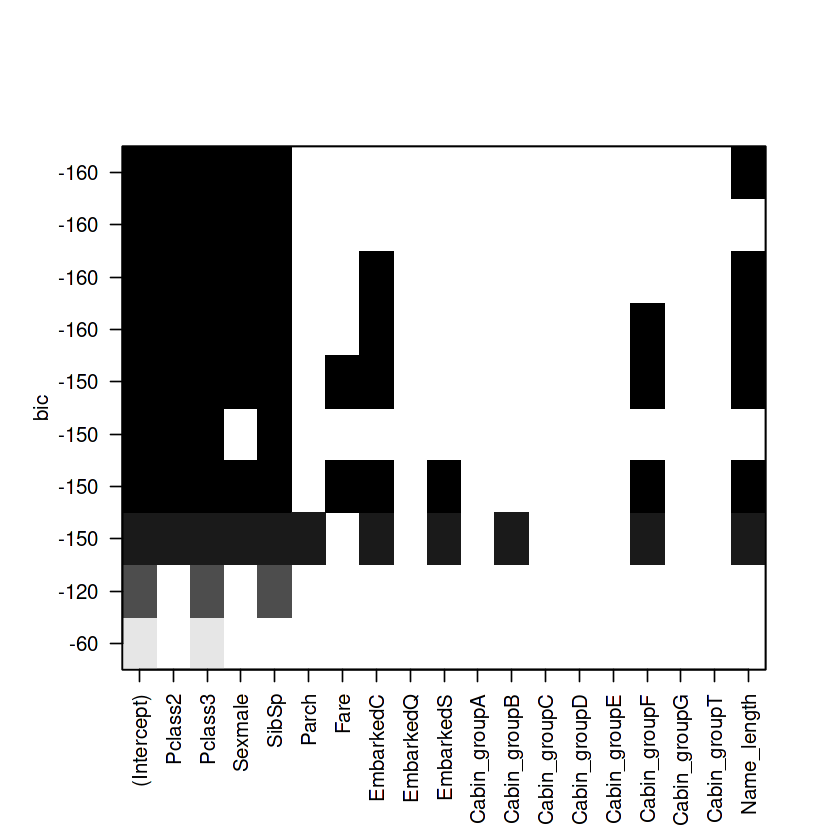

In [41]:
## Plotting the best model
# plot(regfit.full, scale = "Cp")
plot(regfit.full, scale = "bic")

In [42]:
regfit.fwd = regsubsets(Age ~ . , data = df %>% select(-c(PassengerId,Name,Ticket,Cabin,Survived)),nvmax = 10,method = "forward")
regfit.fwd.summary = summary(regfit.fwd)
#plot(regfit.fwd, scale = "bic")

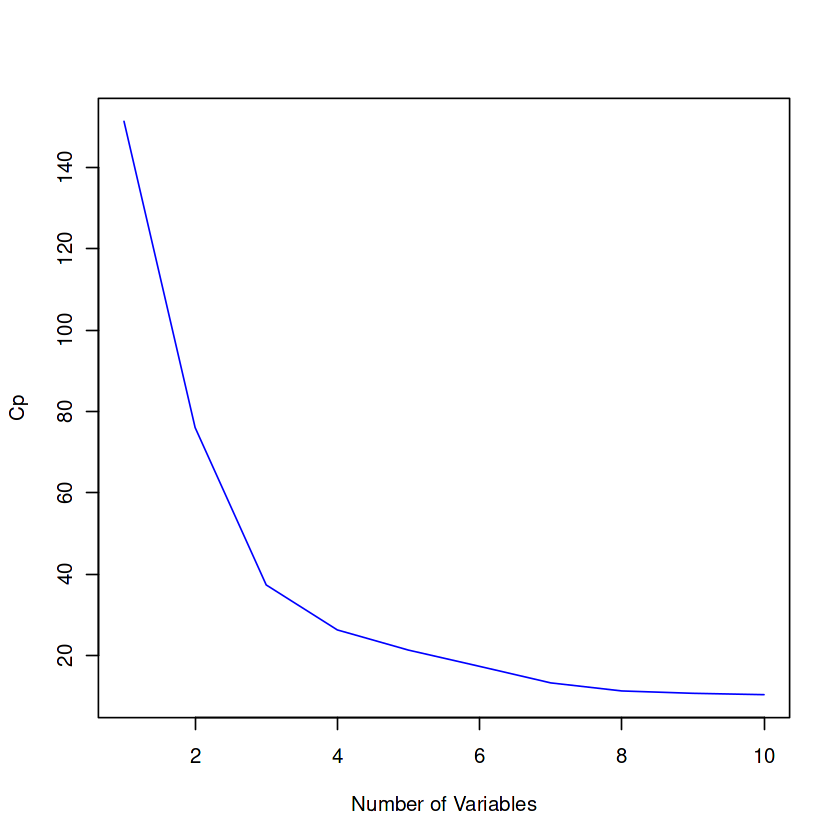

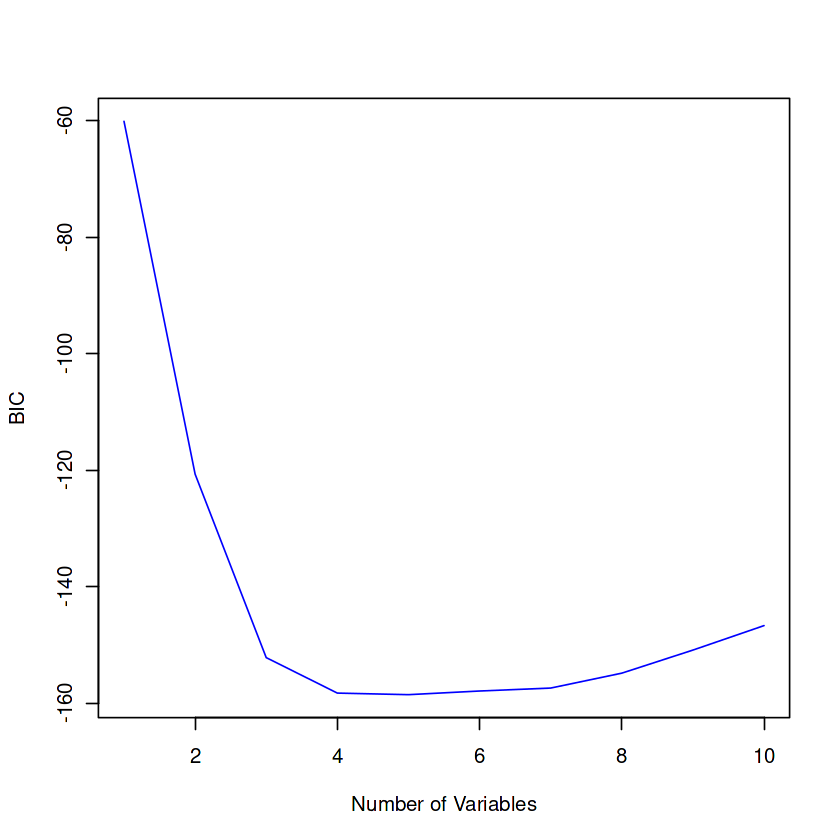

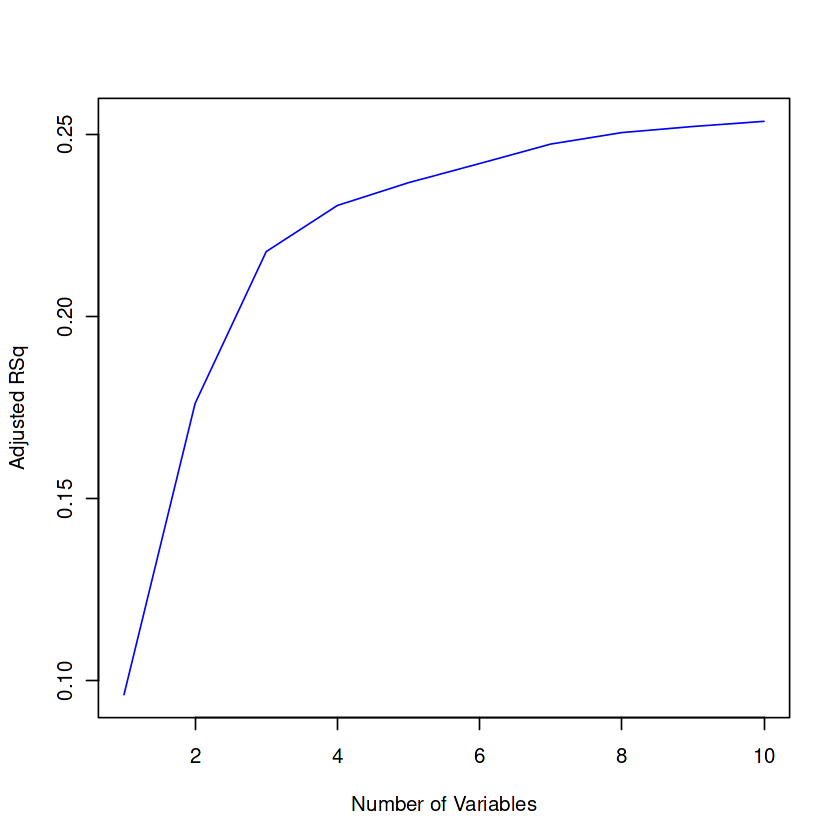

In [43]:
plot(regfit.fwd.summary$cp, type = "l", xlab = "Number of Variables", ylab = "Cp", col = "blue")
plot(regfit.fwd.summary$bic, type = "l", xlab = "Number of Variables", ylab = "BIC", col = "blue")
plot(regfit.fwd.summary$adjr2, type = "l", xlab = "Number of Variables", ylab = "Adjusted RSq", col = "blue")


From the above charts I think, it is best to go with 4 or 5 variable model to impute age. 


In [44]:
as.data.frame(coef(regfit.fwd, 4))
as.data.frame(coef(regfit.fwd, 5))
as.data.frame(coef(regfit.fwd, 6))

,"coef(regfit.fwd, 4)"
,<dbl>
(Intercept),38.207883
Pclass2,-8.563027
Pclass3,-13.129875
Sexmale,3.599630
SibSp,-4.271534


,"coef(regfit.fwd, 5)"
,<dbl>
(Intercept),33.1108520
Pclass2,-8.3332361
Pclass3,-12.6563889
Sexmale,4.8001396
SibSp,-4.5366030
Name_length,0.1509444


,"coef(regfit.fwd, 6)"
,<dbl>
(Intercept),34.6529387
Pclass2,-9.3238069
Pclass3,-13.5268790
Sexmale,4.5746522
SibSp,-4.5863072
EmbarkedC,-3.1754604
Name_length,0.1465186


In [45]:
regfit.bwd = regsubsets(Age ~ . , data = df %>% select(-c(PassengerId,Name,Ticket,Cabin,Survived)),nvmax = 10,method = "backward")
regfit.bwd.summary = summary(regfit.bwd)

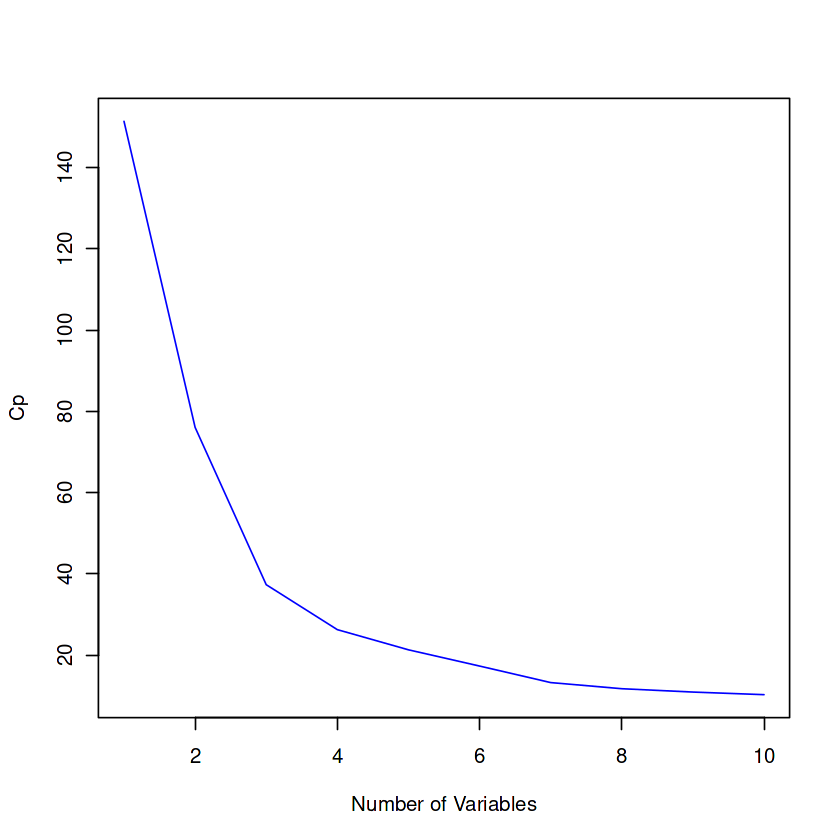

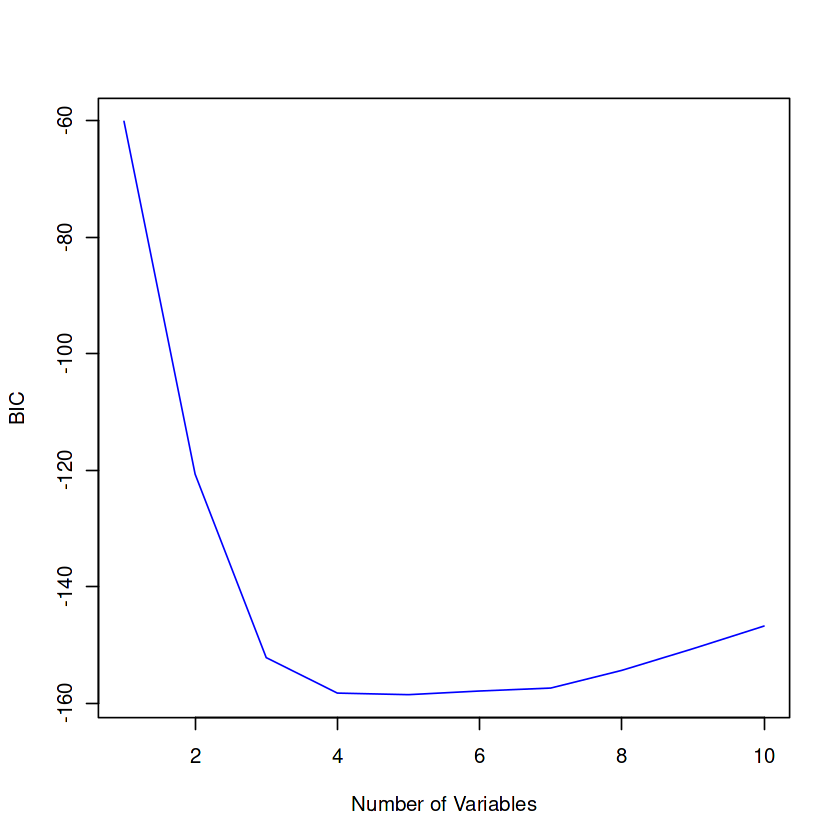

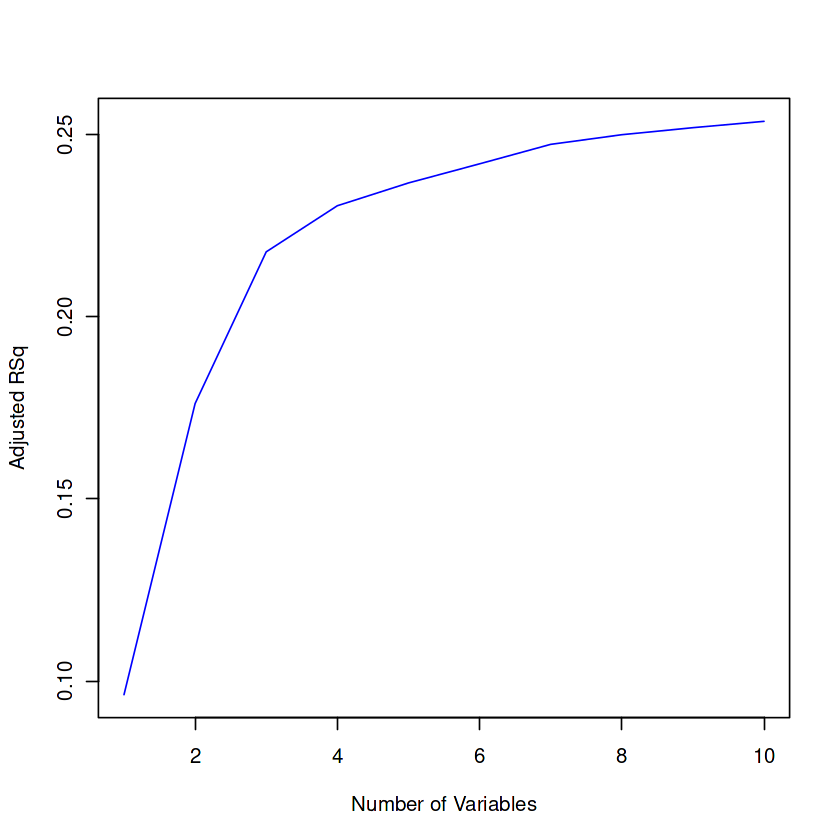

In [46]:
plot(regfit.bwd.summary$cp, type = "l", xlab = "Number of Variables", ylab = "Cp", col = "blue")
plot(regfit.bwd.summary$bic, type = "l", xlab = "Number of Variables", ylab = "BIC", col = "blue")
plot(regfit.bwd.summary$adjr2, type = "l", xlab = "Number of Variables", ylab = "Adjusted RSq", col = "blue")


In [47]:
as.data.frame(coef(regfit.bwd, 4))
as.data.frame(coef(regfit.bwd, 5))
as.data.frame(coef(regfit.bwd, 6))

,"coef(regfit.bwd, 4)"
,<dbl>
(Intercept),38.207883
Pclass2,-8.563027
Pclass3,-13.129875
Sexmale,3.599630
SibSp,-4.271534


,"coef(regfit.bwd, 5)"
,<dbl>
(Intercept),33.1108520
Pclass2,-8.3332361
Pclass3,-12.6563889
Sexmale,4.8001396
SibSp,-4.5366030
Name_length,0.1509444


,"coef(regfit.bwd, 6)"
,<dbl>
(Intercept),34.6529387
Pclass2,-9.3238069
Pclass3,-13.5268790
Sexmale,4.5746522
SibSp,-4.5863072
EmbarkedC,-3.1754604
Name_length,0.1465186


From the above results, it seems that `PClass`, `Sex`, `SibSp`, `Fare`, and  `Name_length` are important in determining the Age, let me try the final model below. I want to train this model on the combined dataset of train and kaggle test sample.


In [48]:
## Removing the Cabin variable from the model
age_model_m2 = lm (Age ~ . , data = rbind(df %>% select(Age,Pclass,Sex,SibSp,Name_length), 
                                            df_kg_test %>% select(Age,Pclass,Sex,SibSp,Name_length)
                                            ))
summary(age_model_m2)


Call:
lm(formula = Age ~ ., data = rbind(df %>% select(Age, Pclass, 
    Sex, SibSp, Name_length), df_kg_test %>% select(Age, Pclass, 
    Sex, SibSp, Name_length)))

Residuals:
    Min      1Q  Median      3Q     Max 
-38.226  -7.716  -1.041   7.382  46.980 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  32.89725    1.86288  17.659  < 2e-16 ***
Pclass2      -9.62300    1.08470  -8.872  < 2e-16 ***
Pclass3     -13.87632    0.95919 -14.467  < 2e-16 ***
Sexmale       4.57201    0.90852   5.032 5.71e-07 ***
SibSp        -3.73410    0.43522  -8.580  < 2e-16 ***
Name_length   0.18037    0.04684   3.851 0.000125 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.55 on 1040 degrees of freedom
  (263 observations deleted due to missingness)
Multiple R-squared:  0.245,	Adjusted R-squared:  0.2414 
F-statistic:  67.5 on 5 and 1040 DF,  p-value: < 2.2e-16


Rows: 418
Columns: 14
$ PassengerId <int> 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903…
$ Pclass      <fct> 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 1, 1, 2, 1, 2, 2, 3, 3, 3…
$ Name        <chr> "Kelly, Mr. James", "Wilkes, Mrs. James (Ellen Needs)", "M…
$ Sex         <chr> "male", "female", "male", "male", "female", "male", "femal…
$ Age         <dbl> 34.5, 47.0, 62.0, 27.0, 22.0, 14.0, 30.0, 26.0, 18.0, 21.0…
$ SibSp       <int> 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0…
$ Parch       <int> 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Ticket      <chr> "330911", "363272", "240276", "315154", "3101298", "7538",…
$ Fare        <dbl> 7.8292, 7.0000, 9.6875, 8.6625, 12.2875, 9.2250, 7.6292, 2…
$ Cabin       <chr> "", "", "", "", "", "", "", "", "", "", "", "", "B45", "",…
$ Embarked    <chr> "Q", "S", "Q", "S", "S", "S", "Q", "S", "C", "S", "S", "S"…
$ Cabin_group <chr> "", "", "", "", "", "", "", "", "", "", "", "", "B", "", "…
$ Name_length <int

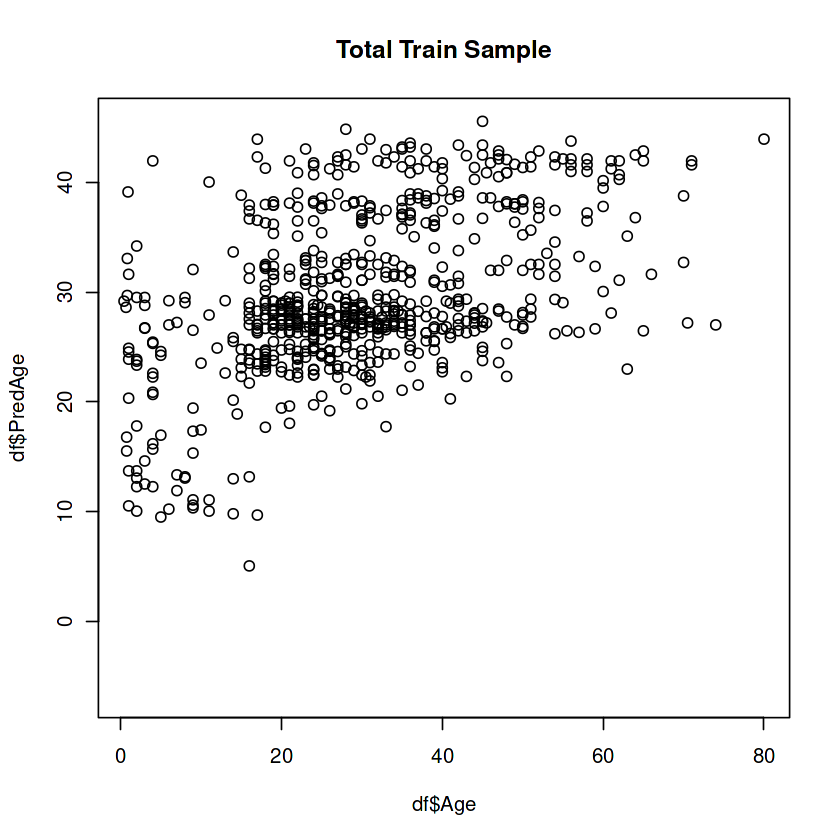

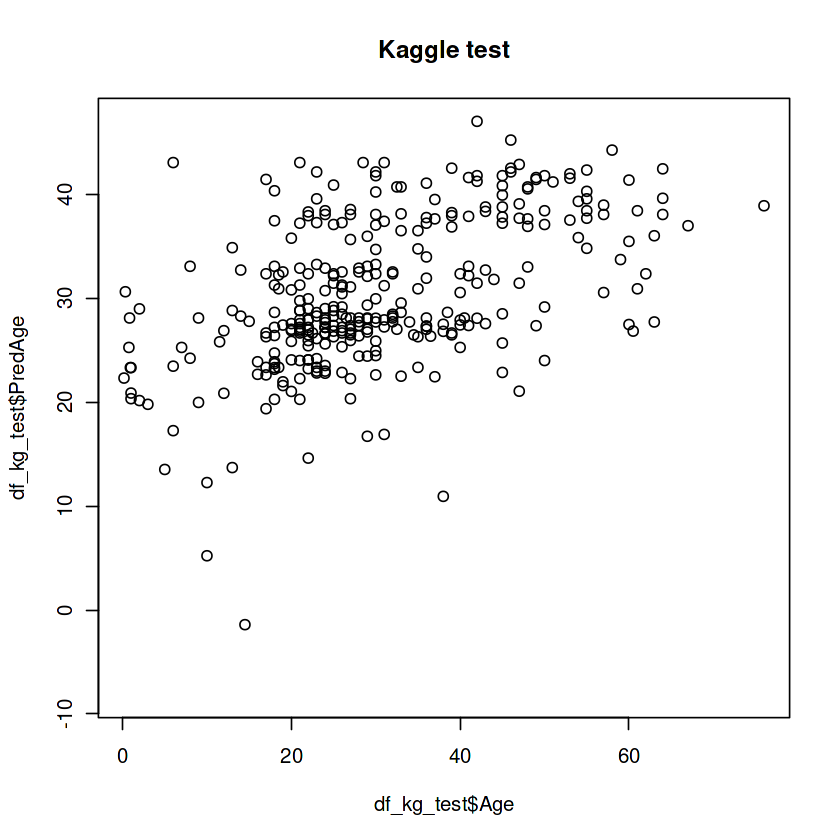

In [49]:
# Now using model 2 to impute the age variable in the test sample and total train sample
df$PredAge = predict(age_model_m2,df)
df_kg_test$PredAge = predict(age_model_m2,df_kg_test)
glimpse(df_kg_test)
plot(df$Age,df$PredAge, main = "Total Train Sample")
plot(df_kg_test$Age,df_kg_test$PredAge, main = "Kaggle test")


In [50]:
## Now updating Age variable in df with the predicted values
df2 = df
df2$Age_old = df2$Age
df2$Age = ifelse(is.na(df2$Age),df2$PredAge,df2$Age)

## Now updating Age variable in df_kg_test with the predicted values
df_kg_test2 = df_kg_test
df_kg_test2$Age_old = df_kg_test2$Age
df_kg_test2$Age = ifelse(is.na(df_kg_test2$Age),df_kg_test2$PredAge,df_kg_test2$Age)


## Checking for fill rates in test sample
df %>% group_by(is.na(Age)) %>% summarise(n = n())
df_kg_test %>% group_by(is.na(Age)) %>% summarise(n = n())
df2 %>% group_by(is.na(Age)) %>% summarise(n = n())
df_kg_test2 %>% group_by(is.na(Age)) %>% summarise(n = n())

is.na(Age),n
<lgl>,<int>
FALSE,714
TRUE,177


is.na(Age),n
<lgl>,<int>
FALSE,332
TRUE,86


is.na(Age),n
<lgl>,<int>
FALSE,891


is.na(Age),n
<lgl>,<int>
FALSE,418


# 7. Making Final Predictions with Age imputed

In [51]:
## Now retaining the logit final model with updated age data
# Training the model on the entire dataset
logit_final_v1 = glm(Survived ~ Age + Sex + SibSp + Pclass + Cabin_group,
               data = df2,
               family = binomial(link = "logit"))
summary(logit_final_v1)
# summary(logit_final)


## Now making the predictions on the kaggle test sample
df_kg_logit_pred_prob2 = predict(logit_final_v1,df_kg_test2,type = "response")
df_kg_logit_pred2 = ifelse(df_kg_logit_pred_prob2  > 0.35,1,0)

## Creating the submission file
df_kg_subm2 = data.frame(PassengerId = df_kg_test2$PassengerId, Survived = df_kg_logit_pred2)

## Writing the submission file
write.csv(df_kg_subm2,"submission.csv",row.names = FALSE)


Call:
glm(formula = Survived ~ Age + Sex + SibSp + Pclass + Cabin_group, 
    family = binomial(link = "logit"), data = df2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6579  -0.5783  -0.4041   0.6065   2.4699  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    3.662305   0.534888   6.847 7.55e-12 ***
Age           -0.044788   0.008393  -5.336 9.50e-08 ***
Sexmale       -2.737143   0.198822 -13.767  < 2e-16 ***
SibSp         -0.428516   0.103126  -4.155 3.25e-05 ***
Pclass2       -0.745807   0.409915  -1.819  0.06885 .  
Pclass3       -1.911470   0.407721  -4.688 2.76e-06 ***
Cabin_groupA   0.792150   0.671092   1.180  0.23785    
Cabin_groupB   0.897149   0.547208   1.640  0.10111    
Cabin_groupC   0.358258   0.487333   0.735  0.46225    
Cabin_groupD   1.240156   0.565117   2.195  0.02820 *  
Cabin_groupE   1.560574   0.557794   2.798  0.00515 ** 
Cabin_groupF   1.126673   0.720399   1.564  0.11783    
Cabin_groupG  -0.